In [1]:
import pyro
import pyro.distributions as dist
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from probability_on_trial.weight import weight, expected_weight, normalize_sample



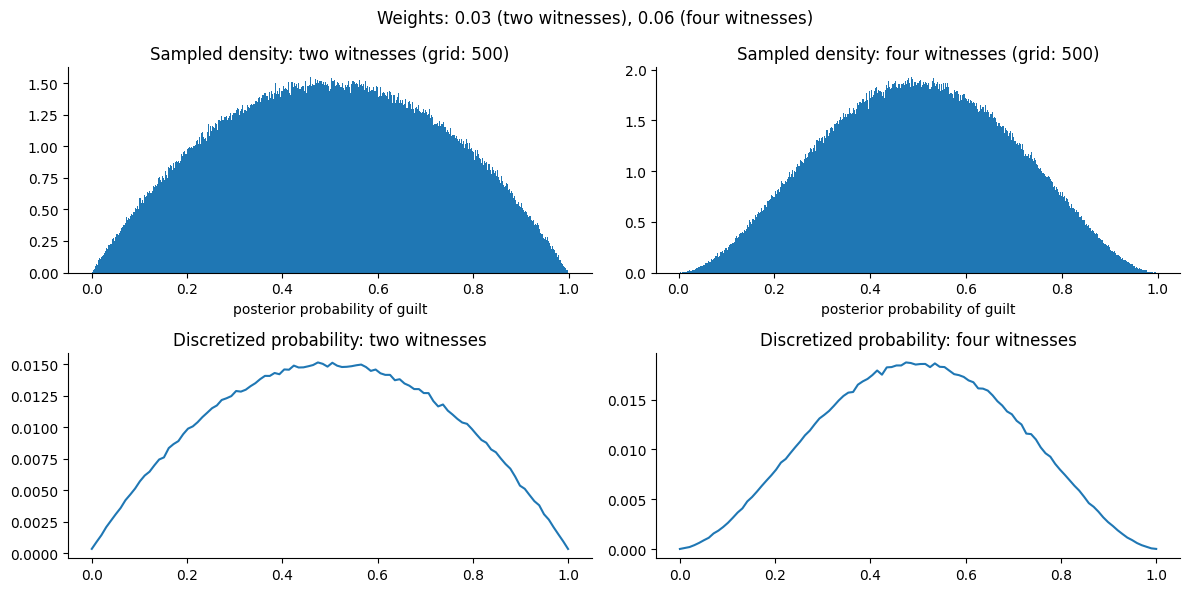

In [3]:
# uncertainties if both original and new witnesses pull in two directions

with pyro.plate("sample", 1e6):
    sample_two_witnesses = pyro.sample("sample_two_witnesses", dist.Beta(2,2))
    sample_four_witnesses = pyro.sample("sample_four_witnesses", dist.Beta(3,3))


discretized_probs_two_witnesses = normalize_sample(sample_two_witnesses, 100)
discretized_probs_four_witnesses = normalize_sample(sample_four_witnesses, 100)

weight_two_witnesses = weight(discretized_probs_two_witnesses)
weight_four_witnesses = weight(discretized_probs_four_witnesses)


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax = ax.flatten()

ax[0].set_title("Sampled density: two witnesses (grid: 500)")
ax[0].hist(sample_two_witnesses.numpy(), bins=500, density=True)
ax[0].set_xlabel("posterior probability of guilt")

ax[1].set_title("Sampled density: four witnesses (grid: 500)")
ax[1].hist(sample_four_witnesses.numpy(), bins=500, density=True)
ax[1].set_xlabel("posterior probability of guilt")


probaxis = np.linspace(0, 1, 100)
ax[2].set_title("Discretized probability: two witnesses")
ax[2].plot(probaxis, discretized_probs_two_witnesses)

ax[3].set_title("Discretized probability: four witnesses")
ax[3].plot(probaxis, discretized_probs_four_witnesses)

plt.suptitle(f"Weights: {weight_two_witnesses:.2f} (two witnesses), {weight_four_witnesses:.2f} (four witnesses)")

plt.tight_layout()
sns.despine()
plt.show()



# save figure
fig.savefig("figures/uncertainties_two_four_witnesses.pdf")


tensor(0.0573) tensor(0.0745) tensor(0.0761)


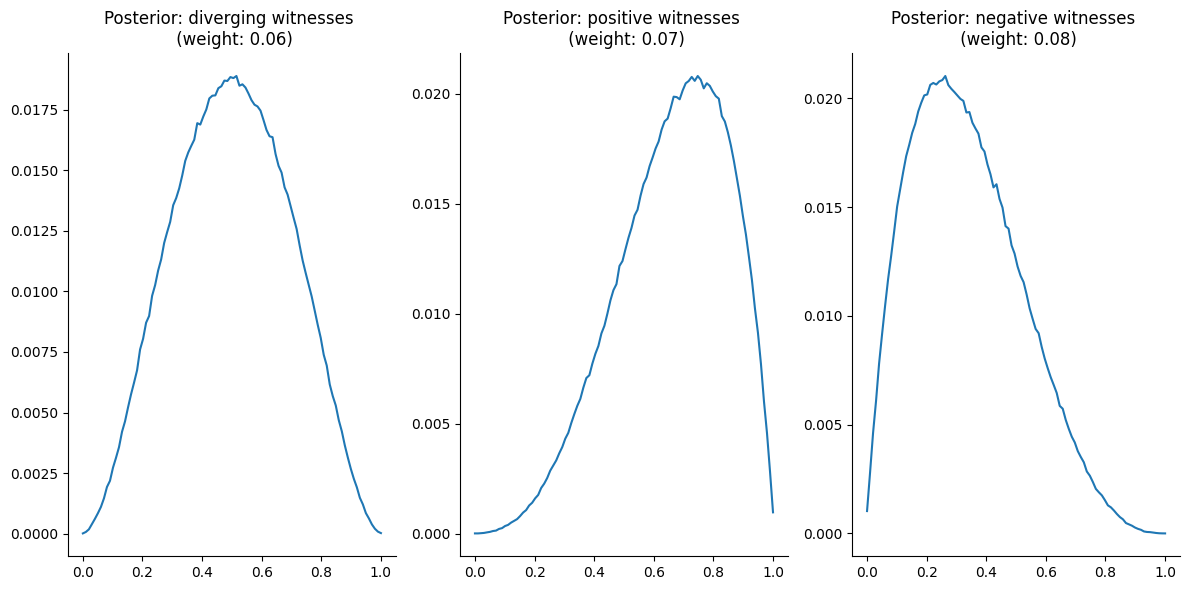

In [7]:
# now posteriors for three evidential scenarios

with pyro.plate("samples", 1e6):
    prior = pyro.sample("prior", dist.Beta(2,2))

    sample_diverging = pyro.sample("sample_four_witnesses", dist.Beta(3,3))
    sample_positive = pyro.sample("sample_positive", dist.Beta(4,2))
    sample_negative = pyro.sample("sample_negative", dist.Beta(2,4))

posterior_diverging = normalize_sample(sample_diverging, 100)
posterior_positive = normalize_sample(sample_positive, 100)
posterior_negative = normalize_sample(sample_negative, 100)

weight_diverging = weight(posterior_diverging)
weight_positive = weight(posterior_positive)
weight_negative = weight(posterior_negative)

print(weight_diverging, weight_positive, weight_negative)

posteriors = torch.stack([posterior_diverging, posterior_positive, posterior_negative])

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax = ax.flatten()

ax[0].set_title(f"Posterior: diverging witnesses \n (weight: {weight_diverging:.2f})")
ax[0].plot(probaxis, posterior_diverging)

ax[1].set_title(f"Posterior: positive witnesses \n (weight: {weight_positive:.2f})")
ax[1].plot(probaxis, posterior_positive)

ax[2].set_title(f"Posterior: negative witnesses \n (weight: {weight_negative:.2f})")
ax[2].plot(probaxis, posterior_negative)

plt.tight_layout()
sns.despine()
plt.show()






# def expected_weight(
#     probs_of_evidence: torch.Tensor,
#     outcome_prior: torch.Tensor,
#     posteriors: torch.Tensor,
#     base=2,
# )



# probs_of_evidence = torch.tensor([1/3, 1/3, 1/3])

# expected_weight = expected_weight(
#     probs_of_evidence,
#     father_prior_now,
#     posteriors,
# )


# posterior weights: A tensor of weights calculated for each of the posterior distributions. Each posterior represents a belief after observing some evidence
# weight changes: The difference between the weights of the posteriors and the prior
# weighted weight changes: The weight_changes values multiplied by the probabilities of the corresponding pieces of evidence
